In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Wild-Animal-Detection.v2i.yolov5pytorch.zip'
unzip_dir = '/content/dataset/'

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

os.listdir(unzip_dir)


Mounted at /content/drive


['README.roboflow.txt',
 'README.dataset.txt',
 'train',
 'valid',
 'test',
 'data.yaml']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/dataset/train'
valid_dir = '/content/dataset/valid'
test_dir = '/content/dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=512,
                                                    class_mode='categorical')

valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   target_size=(224, 224),
                                                   batch_size=512,
                                                   class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=512,
                                                  class_mode='categorical')


Found 3063 images belonging to 2 classes.
Found 291 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = model.fit(train_generator,
                    epochs=7,
                    validation_data=valid_generator)


Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 169s 14s/step - accuracy: 0.8385 - loss: 0.4462 - val_accuracy: 1.0000 - val_loss: 0.0674
Epoch 2/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 1.0000 - loss: 0.0517 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 3/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 4/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 7/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011


Results are great because of good dataset, it is not overfitting, because on the pgraph below, we can see that train accuracy rise on 1st graph and train loss decrease on 2 graph proportionally.

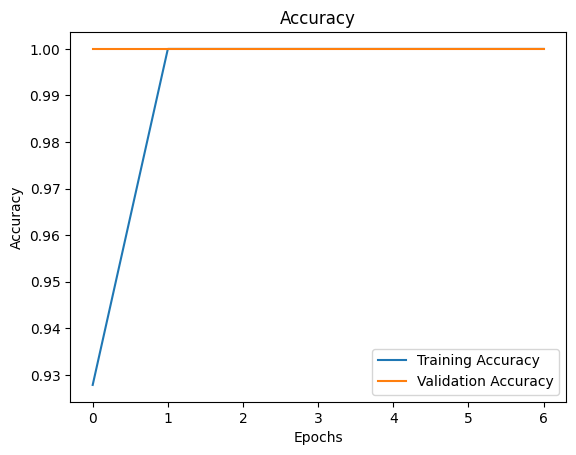

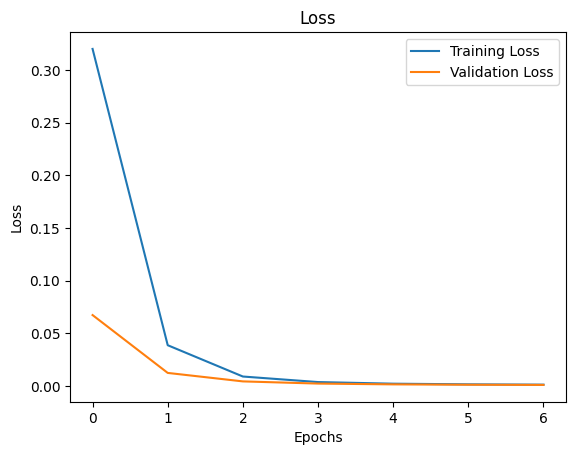

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#Enhaced model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model2 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model2.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,646,018 (94.02 MB)

 Trainable params: 1,054,210 (4.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

In [ ]:
history = model2.fit(train_generator,
                    epochs=7,
                    validation_data=valid_generator)

Epoch 1/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.8553 - loss: 0.3340 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 2/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 3.3216e-05
Epoch 3/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 1.0000 - loss: 6.6200e-04 - val_accuracy: 1.0000 - val_loss: 3.5230e-06
Epoch 4/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 9.6011e-05 - val_accuracy: 1.0000 - val_loss: 1.0295e-06
Epoch 5/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 1.0000 - loss: 3.1408e-05 - val_accuracy: 1.0000 - val_loss: 5.7679e-07
Epoch 6/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 1.7313e-05 - val_accuracy: 1.0000 - val_loss: 4.6987e-07
Epoch 7/7
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 1.5250e-05 - val_accuracy: 1.0000 - val_loss: 4.8093e-07


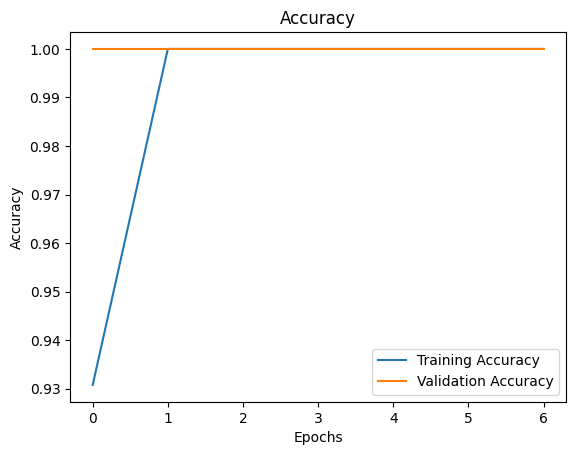

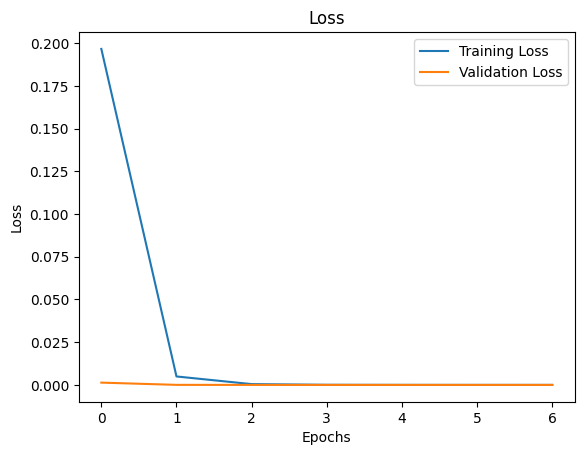

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import numpy as np

baseline_eval = model.evaluate(valid_generator, verbose=1)
baseline_predictions = model.predict(valid_generator)
baseline_predictions_classes = np.argmax(baseline_predictions, axis=1)
true_classes = valid_generator.classes

baseline_accuracy = accuracy_score(true_classes, baseline_predictions_classes)
baseline_precision = precision_score(true_classes, baseline_predictions_classes, average='weighted')
baseline_recall = recall_score(true_classes, baseline_predictions_classes, average='weighted')
baseline_f1 = f1_score(true_classes, baseline_predictions_classes, average='weighted')

print("Baseline Model Evaluation:")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"Precision: {baseline_precision:.4f}")
print(f"Recall: {baseline_recall:.4f}")
print(f"F1-score: {baseline_f1:.4f}")
print("\nClassification Report for Baseline Model:")
print(classification_report(true_classes, baseline_predictions_classes))

enhanced_eval = model2.evaluate(valid_generator, verbose=1)
enhanced_predictions = model2.predict(valid_generator)
enhanced_predictions_classes = np.argmax(enhanced_predictions, axis=1)

enhanced_accuracy = accuracy_score(true_classes, enhanced_predictions_classes)
enhanced_precision = precision_score(true_classes, enhanced_predictions_classes, average='weighted')
enhanced_recall = recall_score(true_classes, enhanced_predictions_classes, average='weighted')
enhanced_f1 = f1_score(true_classes, enhanced_predictions_classes, average='weighted')

print("\nEnhanced Model Evaluation:")
print(f"Accuracy: {enhanced_accuracy:.4f}")
print(f"Precision: {enhanced_precision:.4f}")
print(f"Recall: {enhanced_recall:.4f}")
print(f"F1-score: {enhanced_f1:.4f}")
print("\nClassification Report for Enhanced Model:")
print(classification_report(true_classes, enhanced_predictions_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9966 - loss: 0.5517
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Baseline Model Evaluation:
Accuracy: 0.9966
Precision: 1.0000
Recall: 0.9966
F1-score: 0.9983

Classification Report for Baseline Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       0.00      0.00      0.00         0

    accuracy                           1.00       291
   macro avg       0.50      0.50      0.50       291
weighted avg       1.00      1.00      1.00       291

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 2.7692e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

Enhanced Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report for Enhanced Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [ ]:
!pip install ultralytics


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tYLneyU3pTv1vwx5Dxmk")
project = rf.workspace("hackvengers").project("wild-animal-detection-zdn1e")
version = project.version(2)
dataset = version.download("coco")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wild-Animal-Detection-2 in coco:: 100%|██████████| 3509/3509 [00:00<00:00, 8343.73it/s]


In [ ]:
!pip install tensorflow
!pip install effdet



In [ ]:
import os
import shutil
from roboflow import Roboflow

rf = Roboflow(api_key="tYLneyU3pTv1vwx5Dxmk")

project = rf.workspace("hackvengers").project("wild-animal-detection-zdn1e")
version = project.version(2)
dataset = version.download("coco")

dataset_dir = dataset.location


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import torch
from effdet import create_model
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.transforms as T
from tqdm import tqdm

model = create_model('efficientdet_d0', pretrained=True)

transform = T.Compose([T.Resize(800), T.ToTensor()])

dataset = datasets.CocoDetection(root='/content/dataset/train/images',
                                  annFile='/content/dataset/train/output_coco.json',
                                  transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/10")
    for images, targets in pbar:
        images = images.to(device)

        target_dict = {
            'boxes': torch.tensor([target['bbox'] for target in targets], dtype=torch.float32).to(device),

        }

        loss_dict = model(images, target_dict)

        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        pbar.set_postfix(loss=losses.item())

    print(f"Epoch {epoch+1}/{10} Loss: {losses.item()}")

torch.save(model.state_dict(), 'efficientdet_model.pth')


In [ ]:
!pip install effdet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.6 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=7582e3522e6998022f1242f8bca5705b2166163c3f2a4e2d1a1b7aed6c9f9e2e
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime
